# Mitsuba Wrapper Module
The wrapper module `morticia.scene.mortsuba` provides a light wrapper around some of the Mitsuba classes exposed through the Python API. This notebook illustrates usage of this module.

In [1]:
import morticia.rad.librad as librad
import morticia.scene.mortsuba as mit
import mitsuba.core as mitcor
import mitsuba.render as mitren
# Use auto reload of librad for development purposes
%load_ext autoreload
%autoreload 1
%aimport morticia.rad.librad
%aimport morticia.scene.mortsuba
import morticia.rad.radute as radute
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import datetime
import pytz
# use latex for font rendering
mpl.rcParams['text.usetex'] = True  # Use TeX to format labels (takes a bit longer)
%matplotlib inline

In [2]:
# Create some simple Mitsuba diffuse BSDFs, 6 different colours
diffuseRed = mit.BsdfDiffuse(reflectance=mit.Spectrum([1.0, 0.0, 0.0]))
diffuseGrn = mit.BsdfDiffuse(reflectance=mit.Spectrum([0.0, 1.0, 0.0]))
diffuseBlu = mit.BsdfDiffuse(reflectance=mit.Spectrum([0.0, 0.0, 1.0]))
diffuseMag = mit.BsdfDiffuse(reflectance=mit.Spectrum([1.0, 0.0, 1.0]))
diffuseYel = mit.BsdfDiffuse(reflectance=mit.Spectrum([1.0, 1.0, 0.0]))
diffuseCya = mit.BsdfDiffuse(reflectance=mit.Spectrum([0.0, 1.0, 1.0]))

In [3]:
# Will build a cubi target of specified edge dimension (cubi_size)
cube_size = 3.0
# Create a perspective camera looking at the middle of the cubi somewhere
sensor = mit.SensorPerspective(toWorld=mit.Transform().lookAt(
      target_position=[cube_size/2.0, 0.0, cube_size]), fov=50.0)  
# Use the Mitsuba path tracer
pathintegrator = mit.IntegratorPathTracer()
# Use the default sun and sky emitter environment
sunskyemitter = mit.EmitterSunSky()

In [4]:
# Create a scene and add the geomtry, sensor, emitter and integrator
cubescene = mit.Scene(scenename='colorcubi')
cubi = mit.createCubi([diffuseRed, diffuseMag, diffuseGrn, diffuseYel, diffuseBlu, diffuseCya], size=cube_size)
cubescene.addShapes(cubi)
groundplane = mit.ShapeRectangle(toWorld=mit.Transform().scale([10.0]), 
                                 bsdf=mit.BsdfDiffuse(reflectance=mit.Spectrum([1.0, 1.0, 1.0])))
cubescene.addShape(groundplane)
cubescene.addSensor(sensor)
cubescene.addEmitter(sunskyemitter)
cubescene.addIntegrator(pathintegrator)
cubescene.configure()


In [5]:
# Render the cube scene on the local machine
cubescene.render_local()

In [6]:
# Grab a bitmap
# Can get it in radiometric terms
bitmap = cubescene.getBitmap(componentFormat=mitcor.Bitmap.ESpectrum, pixelFormat=mitcor.Bitmap.EFloat32)
# Or RGB mapped
bitmapRGB = cubescene.getBitmap()  # Defaults to RGB and uint8 component and pixel format respectively

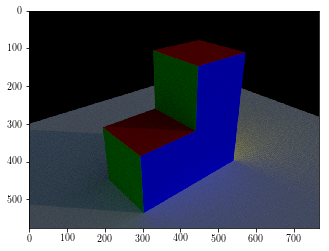

In [7]:
# Plot the RGB bitmap using imshow - there is some tonemapping going on
plt.plot()
plt.imshow(bitmapRGB)